Resize and crop
https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm
from joblib import delayed, Parallel

In [2]:
train_jpg = sorted(glob.glob("/home/jupyter/train_images_bsb_jpg/*.jpg"))
test_jpg = sorted(glob.glob("/home/jupyter/test_images_bsb_jpg/*.jpg"))
print("train .jpg files: ", len(train_jpg))
print("test .jpg files: ", len(test_jpg))

train .jpg files:  674257
test .jpg files:  78545


In [3]:
train_jpg[0:10]

['/home/jupyter/train_images_bsb_jpg/ID_000039fa0.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_00005679d.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_00008ce3c.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_0000950d7.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_0000aee4b.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_0000f1657.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_000178e76.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_00019828f.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_0001dcc25.jpg',
 '/home/jupyter/train_images_bsb_jpg/ID_0001de0e8.jpg']

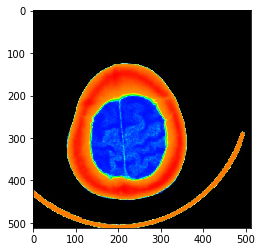

In [16]:
im = cv2.imread(train_jpg[2000])
plt.imshow(im)

In [5]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [51]:
def crop_resize(path, img_size, outputdir):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image_name = os.path.basename(path)
    output_image = os.path.join(outputdir, image_name)
    cv2.imwrite(output_image, image)

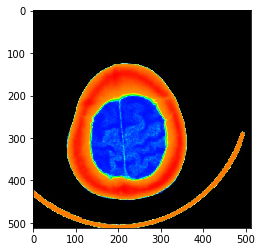

In [41]:
im = cv2.imread(train_jpg[2000])
plt.imshow(im)

In [42]:
crop_resize(train_jpg[2000], 224, '/home/jupyter/')

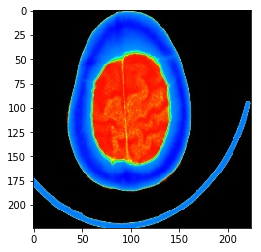

In [8]:
cropped_resized = cv2.imread('/home/jupyter/train_images_bsb_224/ID_00c287073.jpg', cv2.COLOR_BGR2RGB)
plt.imshow(cropped_resized)

In [56]:
def convert_images(inputdir, outputdir, img_size):
    os.makedirs(outputdir, exist_ok=True)
    files = glob.glob(inputdir + "/*.jpg")
    Parallel(n_jobs=8)(delayed(crop_resize)(file, img_size, outputdir) for file in tqdm(files, total=len(files)))

In [59]:
IMG_SIZE = 224
inputdir = '/home/jupyter/train_images_bsb_jpg/'
outputdir = '/home/jupyter/train_images_bsb_224/'

In [60]:
convert_images(inputdir, outputdir, IMG_SIZE)

In [61]:
IMG_SIZE = 224
inputdir = '/home/jupyter/test_images_bsb_jpg/'
outputdir = '/home/jupyter/test_images_bsb_224/'

In [62]:
convert_images(inputdir, outputdir, IMG_SIZE)

In [2]:
train_224 = sorted(glob.glob("/home/jupyter/train_images_bsb_224/*.jpg"))
test_224 = sorted(glob.glob("/home/jupyter/test_images_bsb_224/*.jpg"))
print(len(train_224), len(test_224))

674257 78545


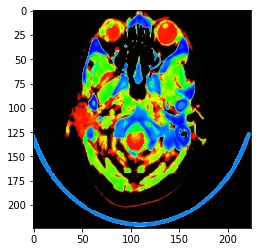

In [5]:
# look at a resized image
test_image = train_224[64]
im = cv2.imread(test_image)
plt.imshow(im)

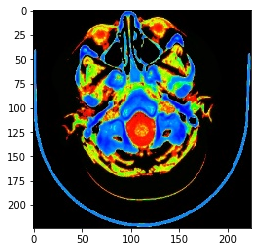

In [6]:
# look at a resized image
test_image = test_224[64]
im = cv2.imread(test_image)
plt.imshow(im)

In [ ]:
#!sudo shutdown -h now